In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('development_dataset.csv')

In [3]:
train_data.head()

VAR1        VAR2      VAR3        VAR4        VAR5      VAR6      VAR7  \
0     1  828.235294  0.138889  321.428571  625.911006  1.818182  1.081550   
1     2  911.764706  0.027778         NaN  611.574748  8.181818  1.344479   
2     3  962.352941  0.833333   35.714286  615.825381  8.181818  0.720796   
3     4  892.941177       NaN         NaN  638.076431  9.090909  0.820218   
4     5  914.117647  0.083333         NaN  626.514988  5.181818  1.372928   

         VAR8       VAR9      VAR10  ...       VAR12  VAR13  VAR14 VAR15  \
0  198.113469        NaN  58.632548  ...  100.083403    1.0      1   1.0   
1  198.600020  22.086661        NaN  ...   15.012510    NaN      1   NaN   
2  197.267767        NaN  58.632548  ...  210.175146   10.0      1  10.0   
3  197.355744   4.363431  58.632548  ...         NaN    NaN      1   NaN   
4  198.790477  85.938202  58.632548  ...  210.175146    NaN      .   NaN   

      VAR16  VAR17  VAR18  VAR19       VAR20   VAR21  
0  1.540594    NaN      1      0  100.104991     Low  
1  1.614613    NaN      0      1  146.654045    High  
2  1.044599    NaN      0      0   98.249570  Medium  
3  1.145729    NaN      1      0  140.862306     Low  
4  1.558341    NaN      1      0  101.268503    High  

[5 rows x 21 columns]

In [4]:
train_data.shape

(34000, 21)

# Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, val = train_test_split(train_data, test_size = 0.25, random_state=2)

In [7]:
train.shape

(25500, 21)

In [8]:
val.shape

(8500, 21)

# Data Exploration

## Checking Data Types

In [9]:
for col in train.columns:
    print(col, train[col].dtype)

VAR1 int64
VAR2 float64
VAR3 float64
VAR4 float64
VAR5 float64
VAR6 float64
VAR7 float64
VAR8 float64
VAR9 float64
VAR10 float64
VAR11 float64
VAR12 float64
VAR13 float64
VAR14 object
VAR15 float64
VAR16 float64
VAR17 float64
VAR18 int64
VAR19 int64
VAR20 float64
VAR21 object


## Step1 Changing VAR14 to Integer and also creating NaN values

In [10]:
train['VAR14'].replace('.', np.nan, inplace = True)
train['VAR14'] = pd.to_numeric(train['VAR14'])

E:\AnacondaInstaller\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\AnacondaInstaller\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
train['VAR14'].value_counts()

1.0     15618
2.0      5985
3.0      2102
4.0       687
0.0       557
5.0       202
6.0        82
7.0        18
8.0        16
10.0        9
12.0        8
9.0         6
11.0        2
15.0        2
22.0        1
18.0        1
20.0        1
23.0        1
Name: VAR14, dtype: int64

# Checking Duplicate Entries

In [12]:
train[train.duplicated()]

Empty DataFrame
Columns: [VAR1, VAR2, VAR3, VAR4, VAR5, VAR6, VAR7, VAR8, VAR9, VAR10, VAR11, VAR12, VAR13, VAR14, VAR15, VAR16, VAR17, VAR18, VAR19, VAR20, VAR21]
Index: []

[0 rows x 21 columns]

## Comment: No dulicate rows

## Checking amount of missing values

In [13]:
for col in train.columns:
    print(col, 100*train[col].isnull().sum()/train[col].shape[0])

VAR1 0.0
VAR2 2.803921568627451
VAR3 9.92156862745098
VAR4 36.63921568627451
VAR5 0.00392156862745098
VAR6 10.325490196078432
VAR7 2.462745098039216
VAR8 2.462745098039216
VAR9 46.74901960784314
VAR10 13.309803921568628
VAR11 22.2078431372549
VAR12 30.827450980392157
VAR13 24.99607843137255
VAR14 0.792156862745098
VAR15 23.545098039215688
VAR16 2.549019607843137
VAR17 65.18823529411765
VAR18 0.0
VAR19 0.0
VAR20 0.0
VAR21 0.0


## Step2: Deleting VAR9 and VAR17 owing to >40% missing values

In [14]:
train.drop(['VAR9','VAR17'], axis = 1, inplace=True)

E:\AnacondaInstaller\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Step 3: Setting VAR1 as index

In [15]:
train.set_index('VAR1', inplace=True)

# Univariate Exploration

In [16]:
categorical_features = ['VAR18', 'VAR19', 'VAR21']

### Checking Distributions

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


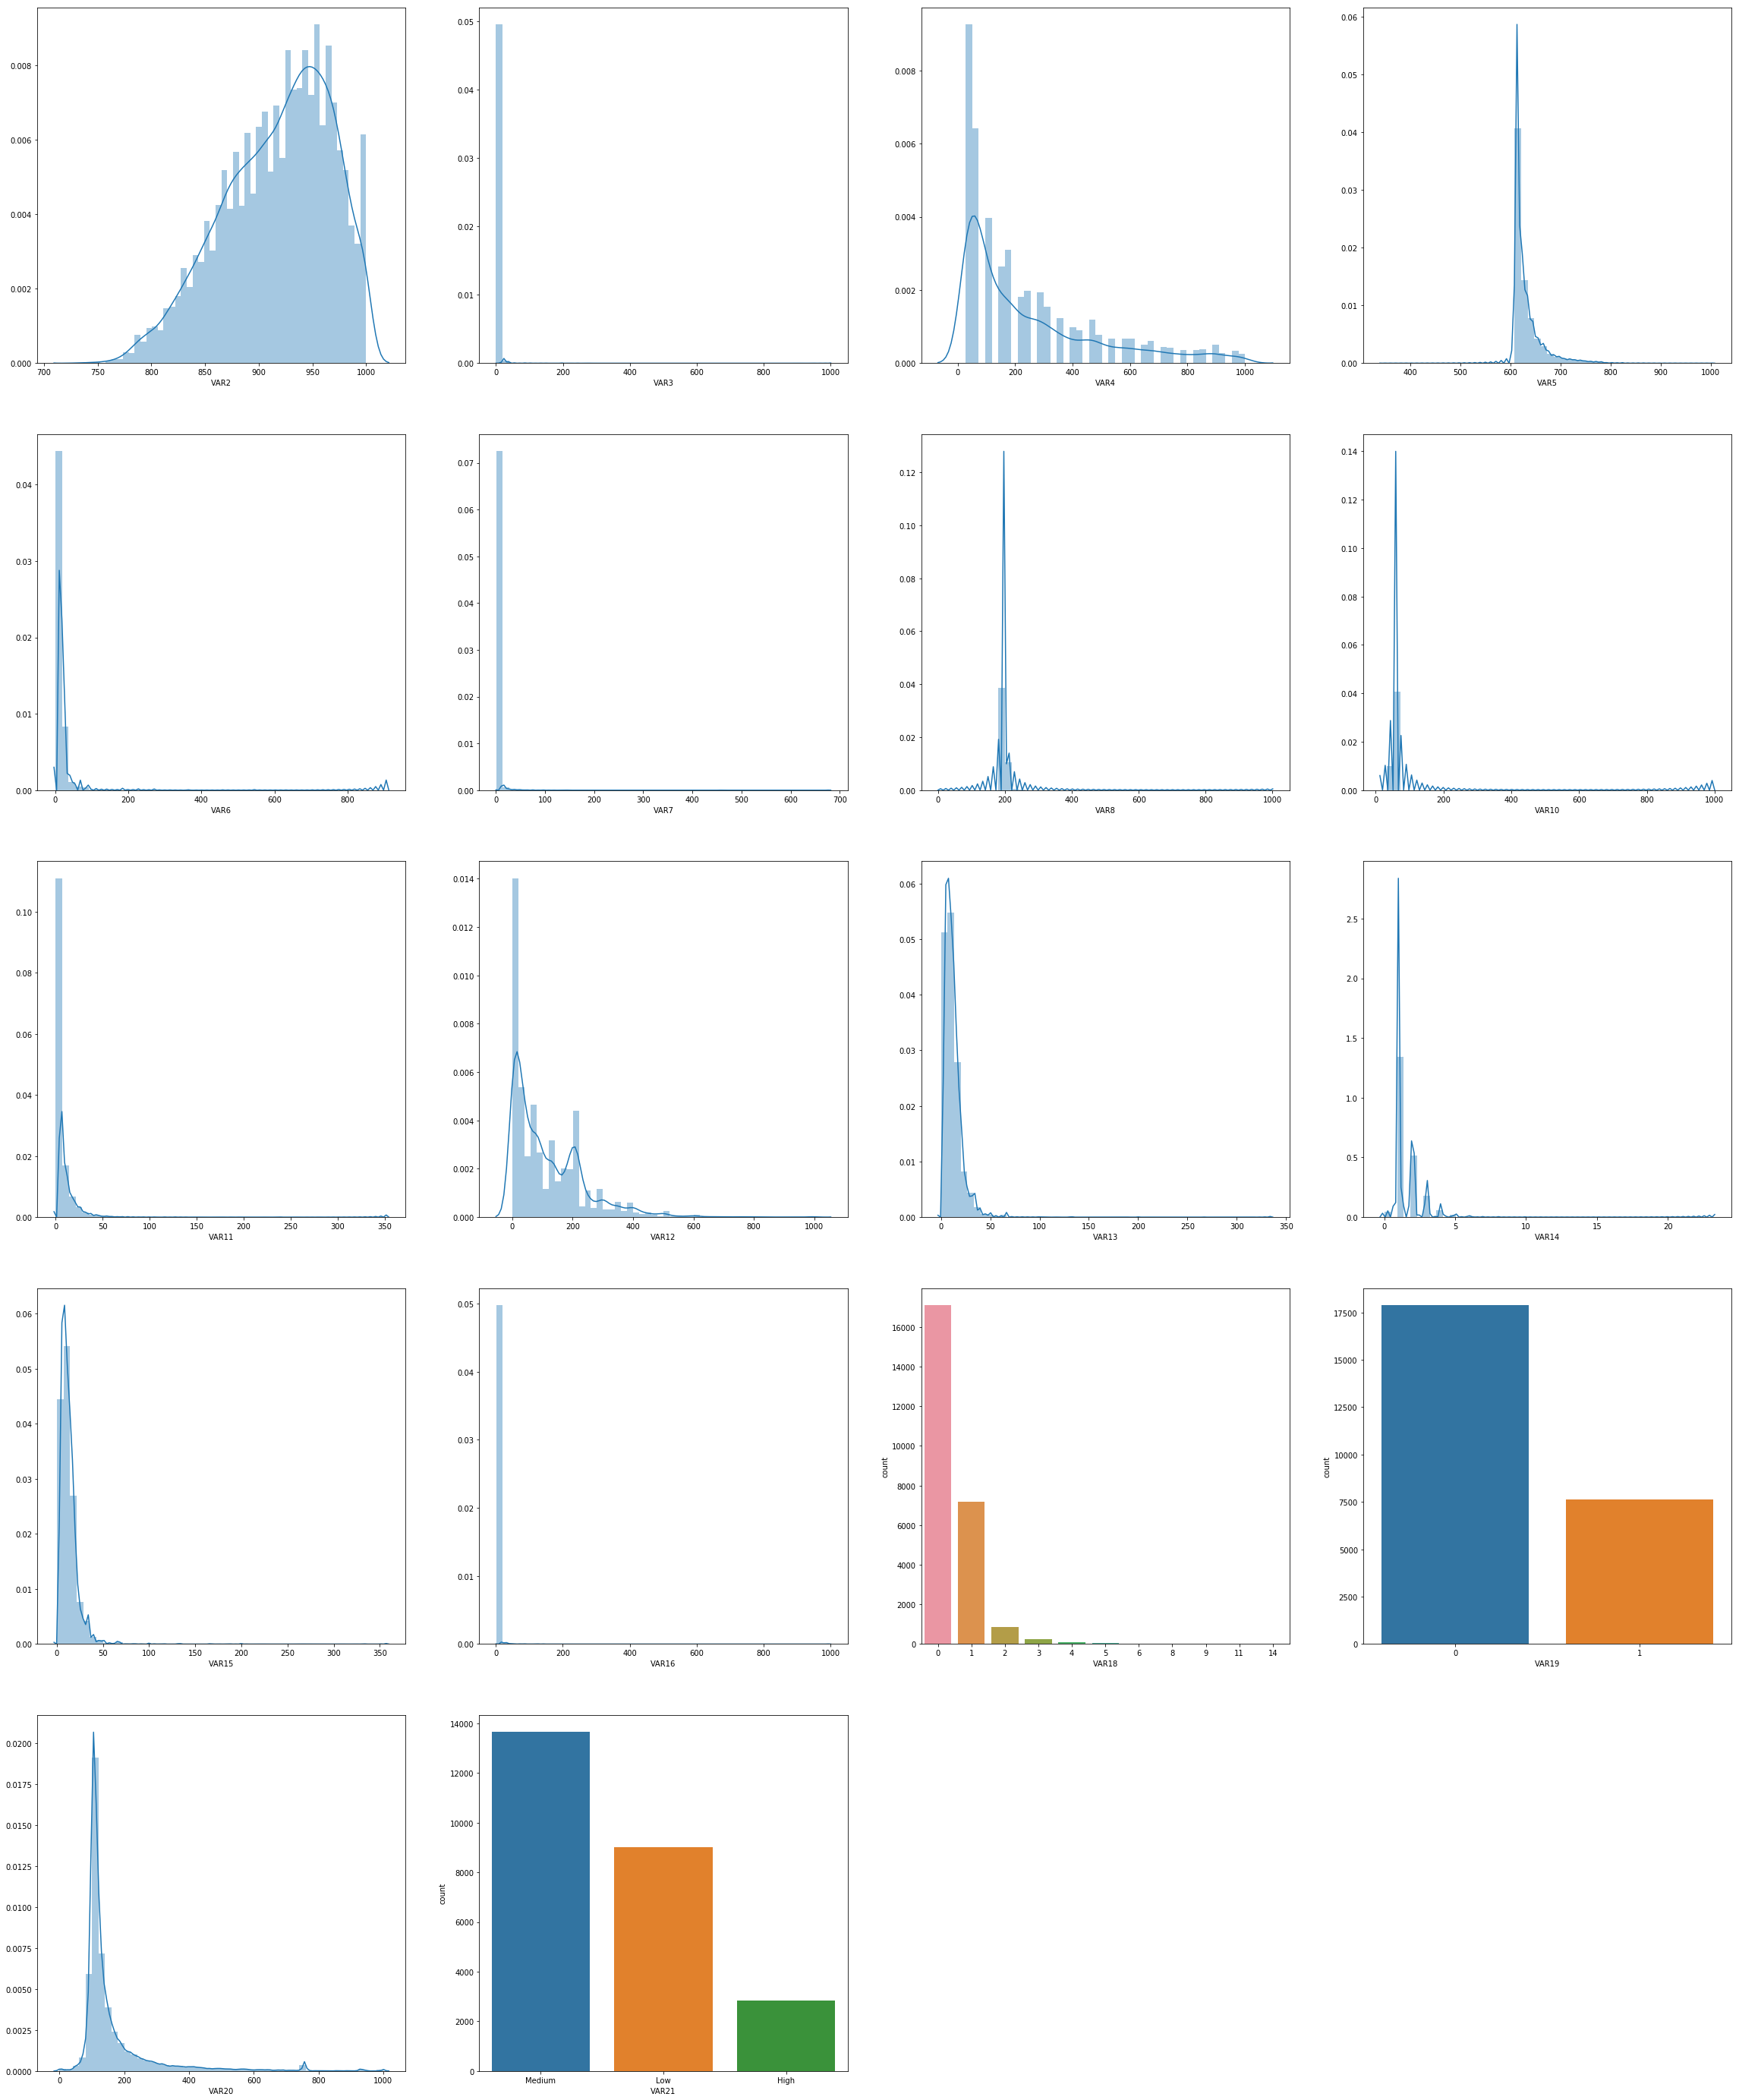

In [17]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(train.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(train[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(train[col].dropna(), ax=ax, label=col)

In [18]:
train.describe()

VAR2          VAR3          VAR4          VAR5          VAR6  \
count  24785.000000  22970.000000  16157.000000  25499.000000  22867.000000   
mean     917.370516      1.155123    247.899672    631.563786     15.364334   
std       50.314593     13.406947    240.534261     30.963901     29.825067   
min      730.588235      0.001333     28.571429    347.053355      0.005000   
25%      882.352941      0.083333     71.428571    611.705173      6.636364   
50%      924.705882      0.166667    142.857143    619.816915     10.000000   
75%      956.470588      0.555556    357.142857    637.403297     18.181818   
max     1000.000000   1000.000000   1000.000000   1000.000000    909.090818   

               VAR7          VAR8         VAR10         VAR11         VAR12  \
count  24872.000000  24872.000000  22106.000000  19837.000000  17639.000000   
mean       2.088210    200.064280     56.493790      5.393323    117.327397   
std        9.707281     11.948707      7.558947     10.448583    120.849700   
min        0.353228      0.000000     13.028620      0.000693      0.834028   
25%        0.693121    197.196705     57.449518      0.638932     15.846539   
50%        1.001567    197.919713     58.632548      2.105982     80.066722   
75%        1.739874    199.679881     58.632548      6.053227    190.158465   
max      681.582083   1000.000000   1000.000000    352.525100   1000.000000   

              VAR13         VAR14         VAR15         VAR16         VAR18  \
count  19126.000000  25298.000000  19496.000000  24850.000000  25500.000000   
mean      11.662239      1.532651     12.441171      2.119043      0.401294   
std        9.926680      0.992471     11.267748      8.764092      0.684650   
min        0.082667      0.000000      0.133333      0.959315      0.000000   
25%        5.733333      1.000000      6.666667      1.042257      0.000000   
50%       10.000000      1.000000     10.000000      1.264980      0.000000   
75%       15.333333      2.000000     16.333333      1.835844      1.000000   
max      333.333333     23.000000    356.666667   1000.000000     14.000000   

              VAR19         VAR20  
count  25500.000000  25500.000000  
mean       0.298863    161.291169  
std        0.457769    122.763979  
min        0.000000      0.000000  
25%        0.000000    104.359725  
50%        0.000000    117.562823  
75%        1.000000    159.952237  
max        1.000000   1000.000000

### Univariate Comments:
- Highly imbalanced Dataset (class label)
- VAR3, VAR6, VAR7, VAR16 highly right skew
- Presence of noise in VAR4, VAR8, VAR10
- Right skewness in other variables too

# Bivariate Explorations

## Scatter Plots

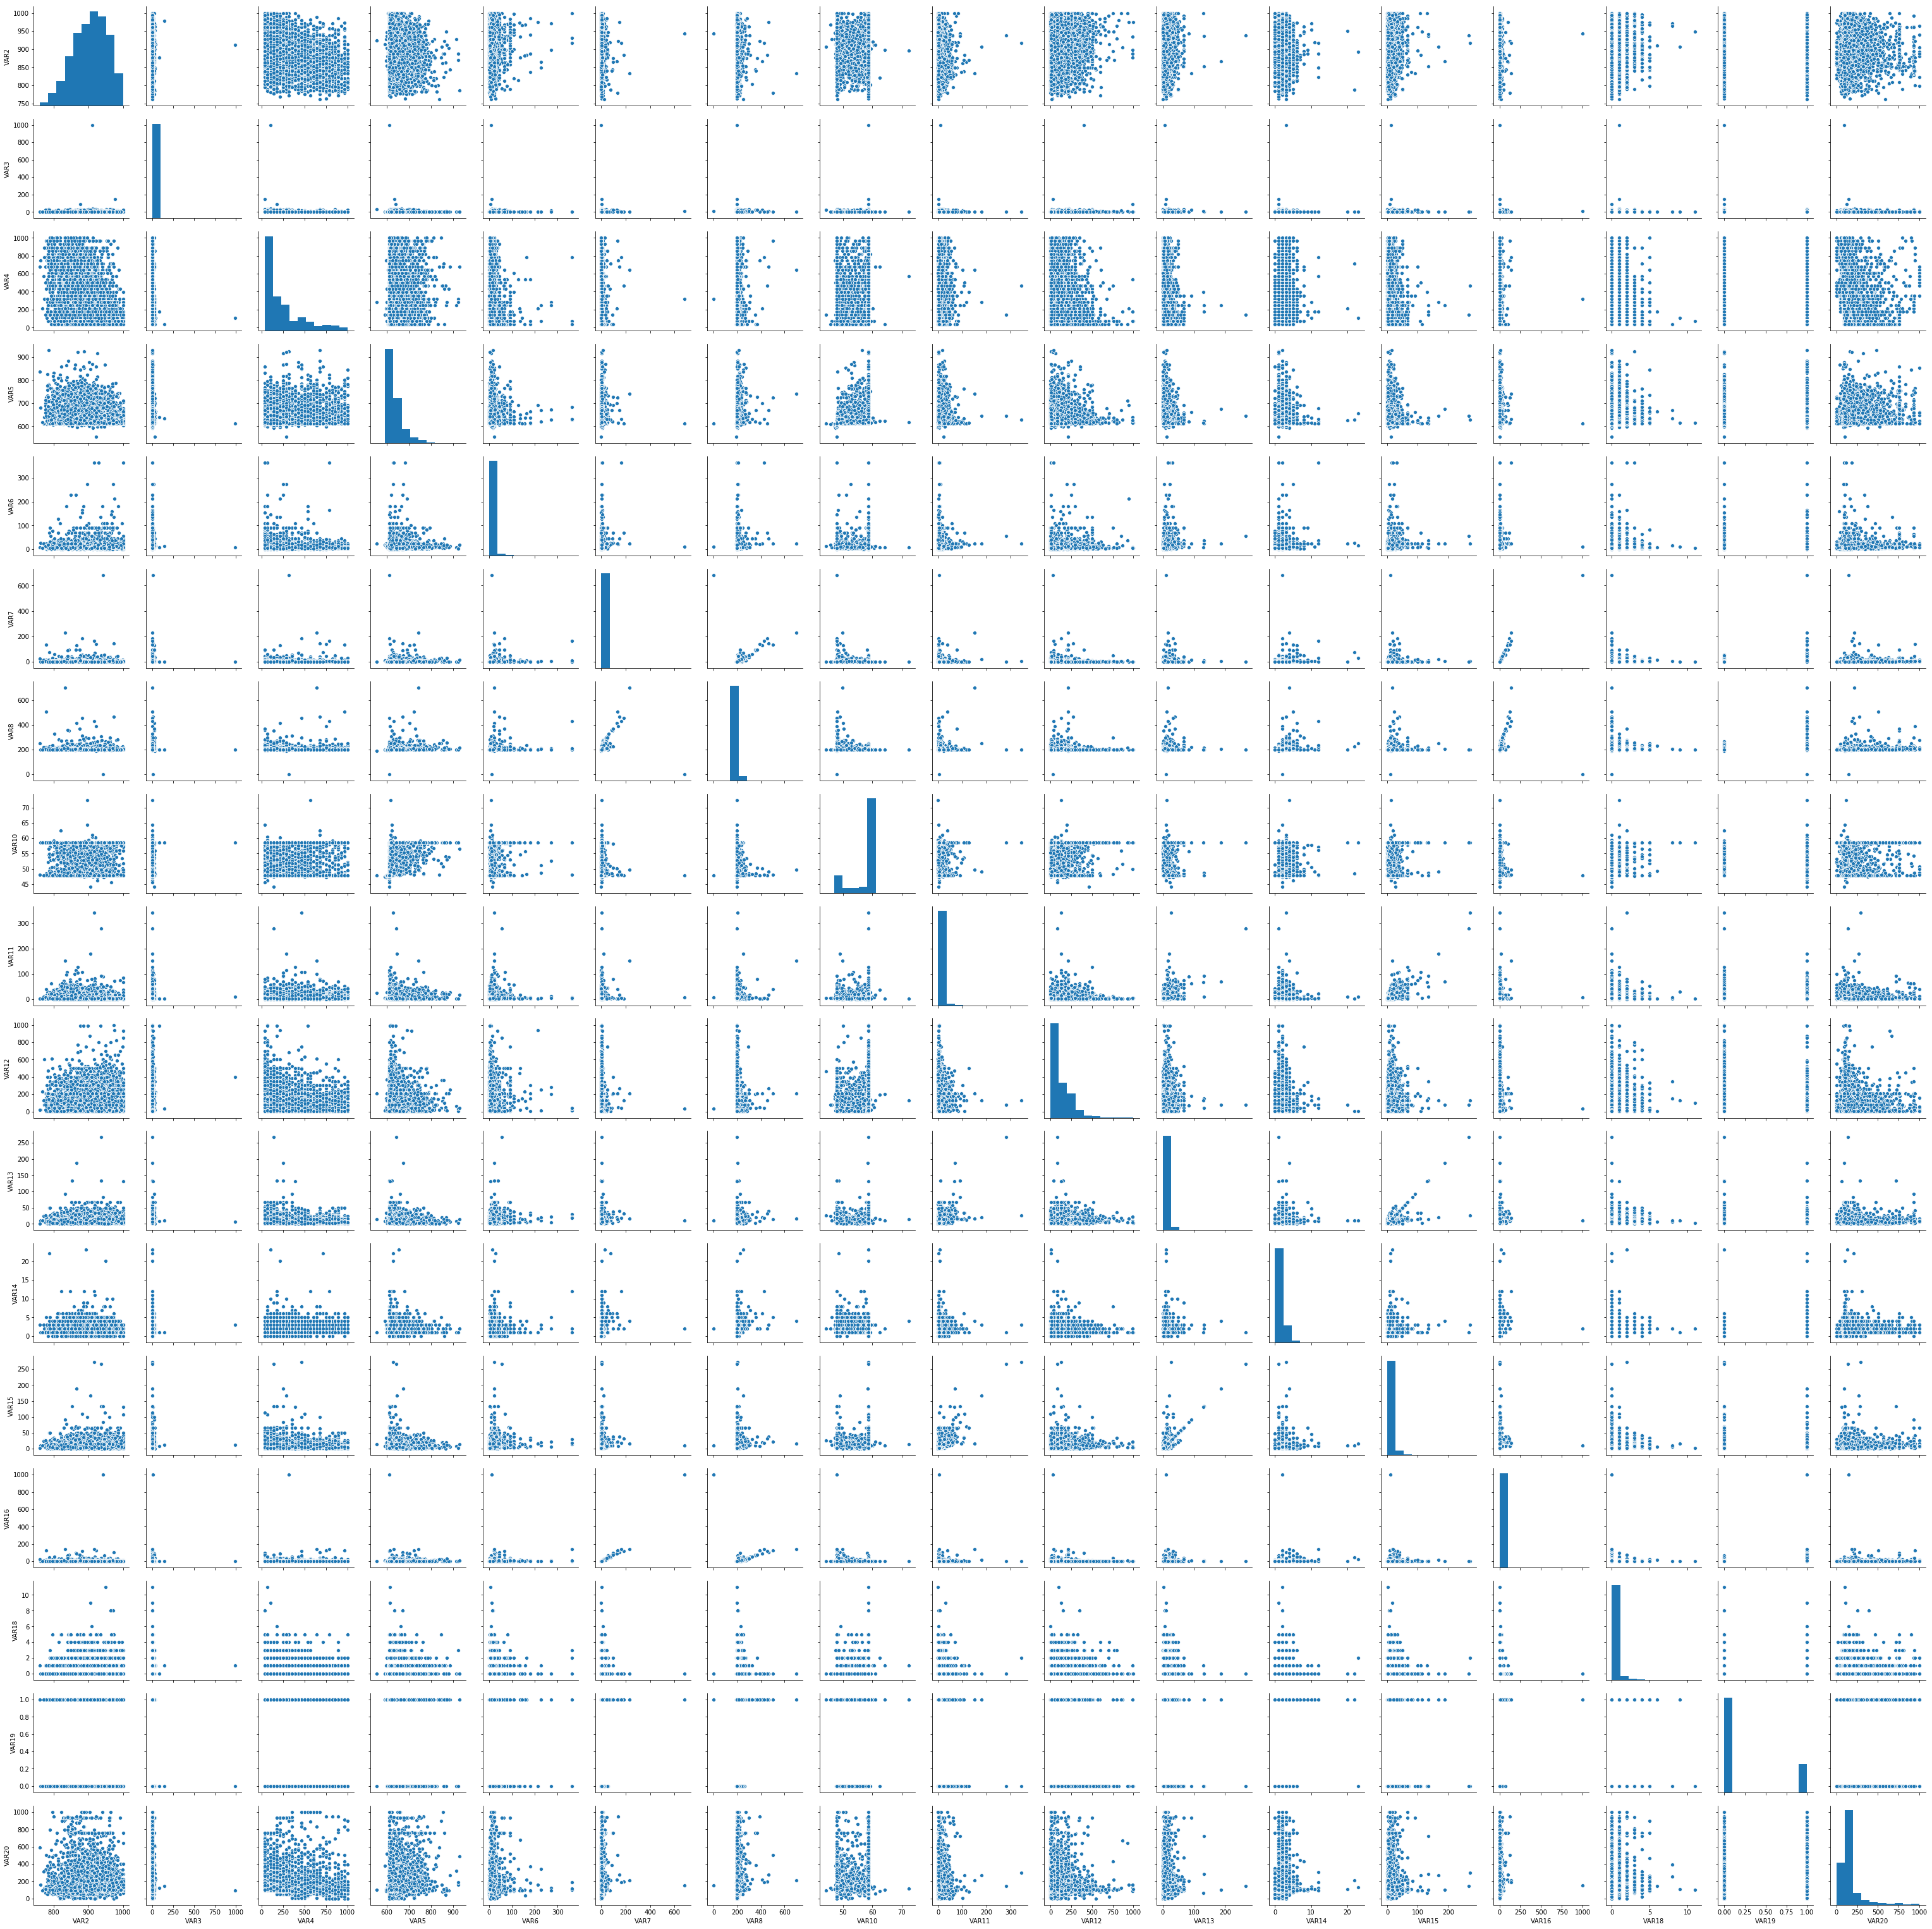

In [19]:
sns.pairplot(train.dropna())

## Comments from Pairplot
- There seems to be an outlier in VAR3, VAR7, VAR8 and VAR16
- Some linear relationship between VAR7, VAR8, VAR16
- Some amount of linear relationship between VAR13 and VAR15

## Checking the Outlier

In [20]:
train[train.VAR3>750]

VAR2         VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                          
25436  911.764706   993.333333  107.142857  611.618514   9.090909  0.562338   
25815  970.588235  1000.000000         NaN  612.357298   8.363636  0.661377   
30618  871.764706  1000.000000  178.571429  725.951447  18.181818  0.869315   

             VAR8      VAR10     VAR11       VAR12      VAR13  VAR14  \
VAR1                                                                   
25436  196.916682  58.632548  8.717755  400.333611   6.666667    3.0   
25815  196.990082  58.632548  1.787902         NaN  13.066667    1.0   
30618  199.308986  58.632548  3.704007         NaN   6.600000    1.0   

           VAR15     VAR16  VAR18  VAR19       VAR20   VAR21  
VAR1                                                          
25436  11.666667  0.959315      1      0   96.041308  Medium  
25815  13.066667  1.035685      0      0  154.648881  Medium  
30618   6.600000  1.394753      1      0  185.581756  Medium

In [21]:
train[train.VAR7>500]

VAR2      VAR3        VAR4        VAR5        VAR6        VAR7  \
VAR1                                                                          
30400  917.647059  0.111111  285.714286  631.327588  181.818182  536.490229   
29583  836.470588  4.166667         NaN  644.462885   22.727273  649.324982   
32847  943.529412  5.555556  321.428571  611.574748   11.363636  681.582083   

              VAR8      VAR10      VAR11       VAR12  VAR13  VAR14  VAR15  \
VAR1                                                                        
30400  1000.000000  47.989842  35.320769         NaN   40.0    3.0   40.0   
29583   412.897858  48.057459   0.065834  155.129274    2.8    3.0    2.8   
32847     0.000000  47.899686   5.112153   31.693078   10.0    2.0   10.0   

             VAR16  VAR18  VAR19       VAR20 VAR21  
VAR1                                                
30400   195.246898      1      1  146.865749   Low  
29583   420.464217      0      1  756.626506  High  
32847  1000.000000      0      1  148.583477   Low

In [22]:
train[train.VAR16>750]

VAR2      VAR3        VAR4        VAR5       VAR6        VAR7  \
VAR1                                                                         
32847  943.529412  5.555556  321.428571  611.574748  11.363636  681.582083   

       VAR8      VAR10     VAR11      VAR12  VAR13  VAR14  VAR15   VAR16  \
VAR1                                                                       
32847   0.0  47.899686  5.112153  31.693078   10.0    2.0   10.0  1000.0   

       VAR18  VAR19       VAR20 VAR21  
VAR1                                   
32847      0      1  148.583477   Low

In [23]:
train[train.VAR8<100]

VAR2      VAR3        VAR4        VAR5       VAR6        VAR7  \
VAR1                                                                         
32847  943.529412  5.555556  321.428571  611.574748  11.363636  681.582083   

       VAR8      VAR10     VAR11      VAR12  VAR13  VAR14  VAR15   VAR16  \
VAR1                                                                       
32847   0.0  47.899686  5.112153  31.693078   10.0    2.0   10.0  1000.0   

       VAR18  VAR19       VAR20 VAR21  
VAR1                                   
32847      0      1  148.583477   Low

In [24]:
train[train.VAR5<500]

VAR2      VAR3  VAR4        VAR5       VAR6       VAR7  \
VAR1                                                                  
14588  885.882353  1.165367   NaN  347.053355  31.818182  52.228776   

             VAR8      VAR10  VAR11      VAR12  VAR13  VAR14  VAR15  \
VAR1                                                                  
14588  156.320348  47.899686    NaN  20.016681    NaN    1.0    NaN   

           VAR16  VAR18  VAR19       VAR20   VAR21  
VAR1                                                
14588  37.196697      1      0  332.432014  Medium

**Comment: We can remove the outliers found from VAR3 because all of the target variables are MEdium (which won't affect if the Medium variables go slightly down). And we remove the common outlier between VAR7 and VAR16**

## Step3: Remove the outlier

In [25]:
train.drop(32847, axis=0, inplace=True)
train.drop([25436, 25815, 30618], axis=0, inplace=True)
train.drop(14588, axis=0, inplace=True)

E:\AnacondaInstaller\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


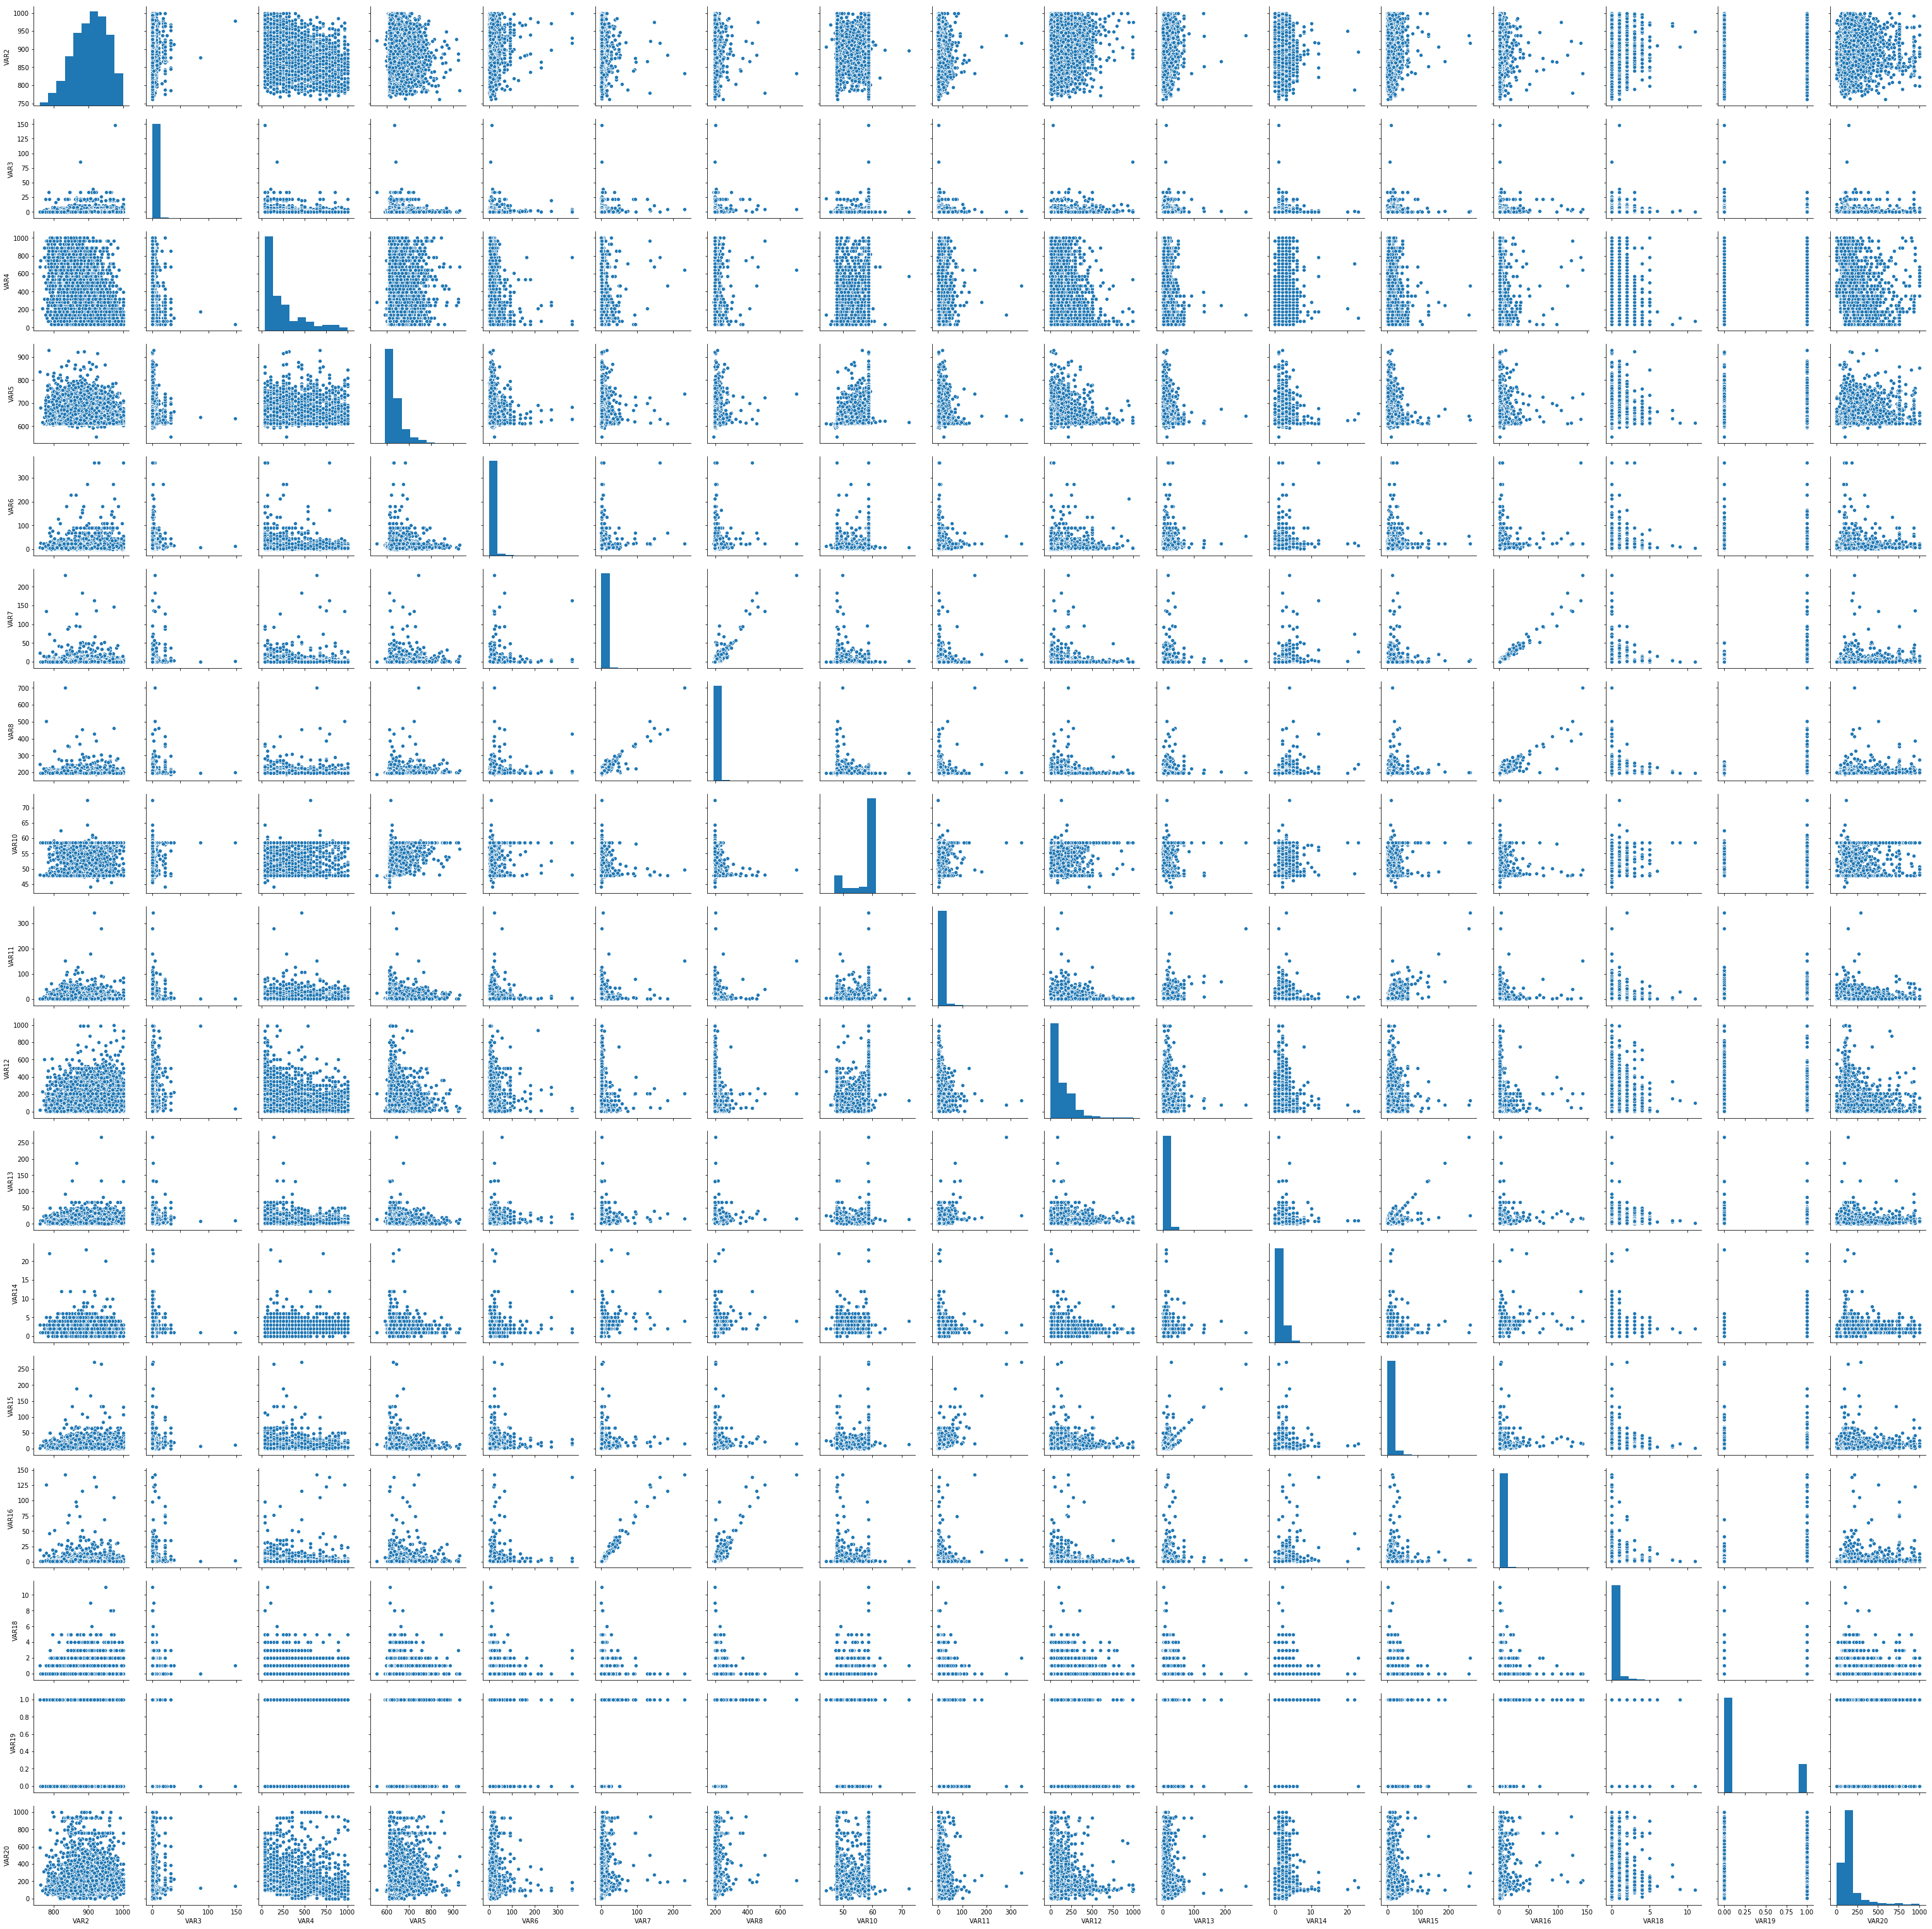

In [26]:
sns.pairplot(train.dropna())

### Comment: The variance in VAR3, VAR7 and VAR16 have been increased for good

## Checking relationships between variables

In [27]:
train.corr()

VAR2      VAR3      VAR4      VAR5      VAR6      VAR7      VAR8  \
VAR2   1.000000  0.009864 -0.517579 -0.198724  0.026675 -0.031543 -0.049770   
VAR3   0.009864  1.000000 -0.017925  0.008277  0.053160  0.036016  0.049029   
VAR4  -0.517579 -0.017925  1.000000  0.207805 -0.030379  0.016928  0.062811   
VAR5  -0.198724  0.008277  0.207805  1.000000  0.029180  0.086414  0.195889   
VAR6   0.026675  0.053160 -0.030379  0.029180  1.000000  0.101879  0.128551   
VAR7  -0.031543  0.036016  0.016928  0.086414  0.101879  1.000000  0.833459   
VAR8  -0.049770  0.049029  0.062811  0.195889  0.128551  0.833459  1.000000   
VAR10  0.037915 -0.005679 -0.029375  0.127194  0.163254 -0.030515 -0.066906   
VAR11 -0.182472  0.014840  0.207945  0.092146  0.059041  0.077207  0.136436   
VAR12  0.147454  0.119086 -0.104517 -0.054466  0.031376 -0.004135 -0.000243   
VAR13  0.149245  0.035828 -0.108166 -0.052832  0.141122  0.080258  0.103449   
VAR14 -0.049337  0.008522  0.053401  0.034701  0.049995  0.161993  0.204404   
VAR15  0.109437  0.029355 -0.062226 -0.037512  0.122317  0.072584  0.098746   
VAR16 -0.035663  0.038817  0.020074  0.100476  0.104747  0.967459  0.804630   
VAR18  0.063190  0.018883 -0.044342  0.038855  0.046929  0.029359  0.043761   
VAR19 -0.057745  0.018817  0.110291 -0.132372  0.080001  0.119156  0.165127   
VAR20 -0.107153  0.038074  0.045976  0.224571  0.074294  0.128345  0.168143   

          VAR10     VAR11     VAR12     VAR13     VAR14     VAR15     VAR16  \
VAR2   0.037915 -0.182472  0.147454  0.149245 -0.049337  0.109437 -0.035663   
VAR3  -0.005679  0.014840  0.119086  0.035828  0.008522  0.029355  0.038817   
VAR4  -0.029375  0.207945 -0.104517 -0.108166  0.053401 -0.062226  0.020074   
VAR5   0.127194  0.092146 -0.054466 -0.052832  0.034701 -0.037512  0.100476   
VAR6   0.163254  0.059041  0.031376  0.141122  0.049995  0.122317  0.104747   
VAR7  -0.030515  0.077207 -0.004135  0.080258  0.161993  0.072584  0.967459   
VAR8  -0.066906  0.136436 -0.000243  0.103449  0.204404  0.098746  0.804630   
VAR10  1.000000 -0.050514  0.037512 -0.017956 -0.090312 -0.022194 -0.025085   
VAR11 -0.050514  1.000000  0.032588  0.377474  0.063615  0.580352  0.074638   
VAR12  0.037512  0.032588  1.000000  0.113745 -0.022671  0.106164 -0.005594   
VAR13 -0.017956  0.377474  0.113745  1.000000  0.045765  0.854541  0.082179   
VAR14 -0.090312  0.063615 -0.022671  0.045765  1.000000  0.048504  0.172839   
VAR15 -0.022194  0.580352  0.106164  0.854541  0.048504  1.000000  0.074428   
VAR16 -0.025085  0.074638 -0.005594  0.082179  0.172839  0.074428  1.000000   
VAR18  0.018331  0.033386  0.079857  0.070854 -0.017816  0.065011  0.032430   
VAR19 -0.227608  0.077608  0.030077  0.074165  0.332955  0.075338  0.125161   
VAR20 -0.021651  0.084906 -0.073671  0.036171  0.021922  0.038614  0.141516   

          VAR18     VAR19     VAR20  
VAR2   0.063190 -0.057745 -0.107153  
VAR3   0.018883  0.018817  0.038074  
VAR4  -0.044342  0.110291  0.045976  
VAR5   0.038855 -0.132372  0.224571  
VAR6   0.046929  0.080001  0.074294  
VAR7   0.029359  0.119156  0.128345  
VAR8   0.043761  0.165127  0.168143  
VAR10  0.018331 -0.227608 -0.021651  
VAR11  0.033386  0.077608  0.084906  
VAR12  0.079857  0.030077 -0.073671  
VAR13  0.070854  0.074165  0.036171  
VAR14 -0.017816  0.332955  0.021922  
VAR15  0.065011  0.075338  0.038614  
VAR16  0.032430  0.125161  0.141516  
VAR18  1.000000  0.032718  0.099342  
VAR19  0.032718  1.000000  0.092779  
VAR20  0.099342  0.092779  1.000000

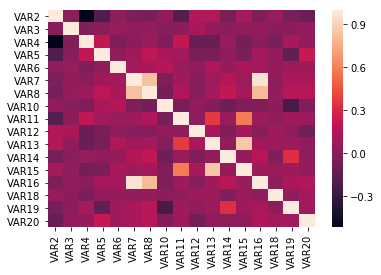

In [28]:
sns.heatmap(train.corr())

## Comment:
- Correlation between VAR7 and VAR16: 0.96
- Correlation between VAR7 and VAR8: 0.83
- Correlation between VAR8 and VAR16: 0.80

### Step3: We will drop the VAR16, because in observing the Data Dictionary it is a 3month variable, while we are dealing with 6 months variables

In [29]:
train.VAR7.isnull().sum()

628

In [30]:
train.VAR16.isnull().sum()

650

In [31]:
(train.VAR7.isnull() & train.VAR16.isnull()).sum()

627

## Step5: Dropping VAR16 on account of redudancy

In [32]:
train.drop('VAR16', axis=1, inplace=True)

E:\AnacondaInstaller\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## TODO: Statistical Tests (Q->C)

# Target Labels

In [33]:
y_train = train['VAR21'].map({'Low':-1, 'Medium':0, 'High':1})
X_train = train.drop('VAR21', axis=1)

# Missing Value Imputation

### Comments:
- VAR14, VAR18, VAR19 by most frequent
- Others by median

In [34]:
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp_freq.fit(X_train[['VAR14', 'VAR18', 'VAR19']])
X_train[['VAR14', 'VAR18', 'VAR19']] = imp_freq.transform(X_train[['VAR14', 'VAR18', 'VAR19']])

imp_med.fit(X_train)

X_train_new_arr = imp_med.transform(X_train)

X_train_new = pd.DataFrame(X_train_new_arr, index=X_train.index, columns = X_train.columns)

In [35]:
X_train_new.head()

VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                       
6730   982.352941  1.000000   71.428571  611.574748  10.000000  0.870128   
12884  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  931.764706  2.405556  142.857143  636.772180  10.909091  1.741903   
24498  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11       VAR12      VAR13  VAR14  \
VAR1                                                                    
6730   197.682893  47.899686   3.580655   80.066722  20.000000    2.0   
12884  200.014723  58.632548   2.105289   40.033361  10.000000    2.0   
12749  197.449262  48.141176  11.596416  200.166806  12.333333    2.0   
27420  199.668570  58.632548   2.105289   80.066722  10.000000    3.0   
24498  196.962029  58.632548   2.133702   80.066722   8.666667    1.0   

           VAR15  VAR18  VAR19       VAR20  
VAR1                                        
6730   20.000000    0.0    1.0  141.745267  
12884  10.000000    0.0    0.0  121.888124  
12749  12.333333    0.0    1.0   94.567986  
27420  10.000000    1.0    0.0  756.626506  
24498   8.666667    0.0    0.0  110.149742

## Plots after Missing Value imputation

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


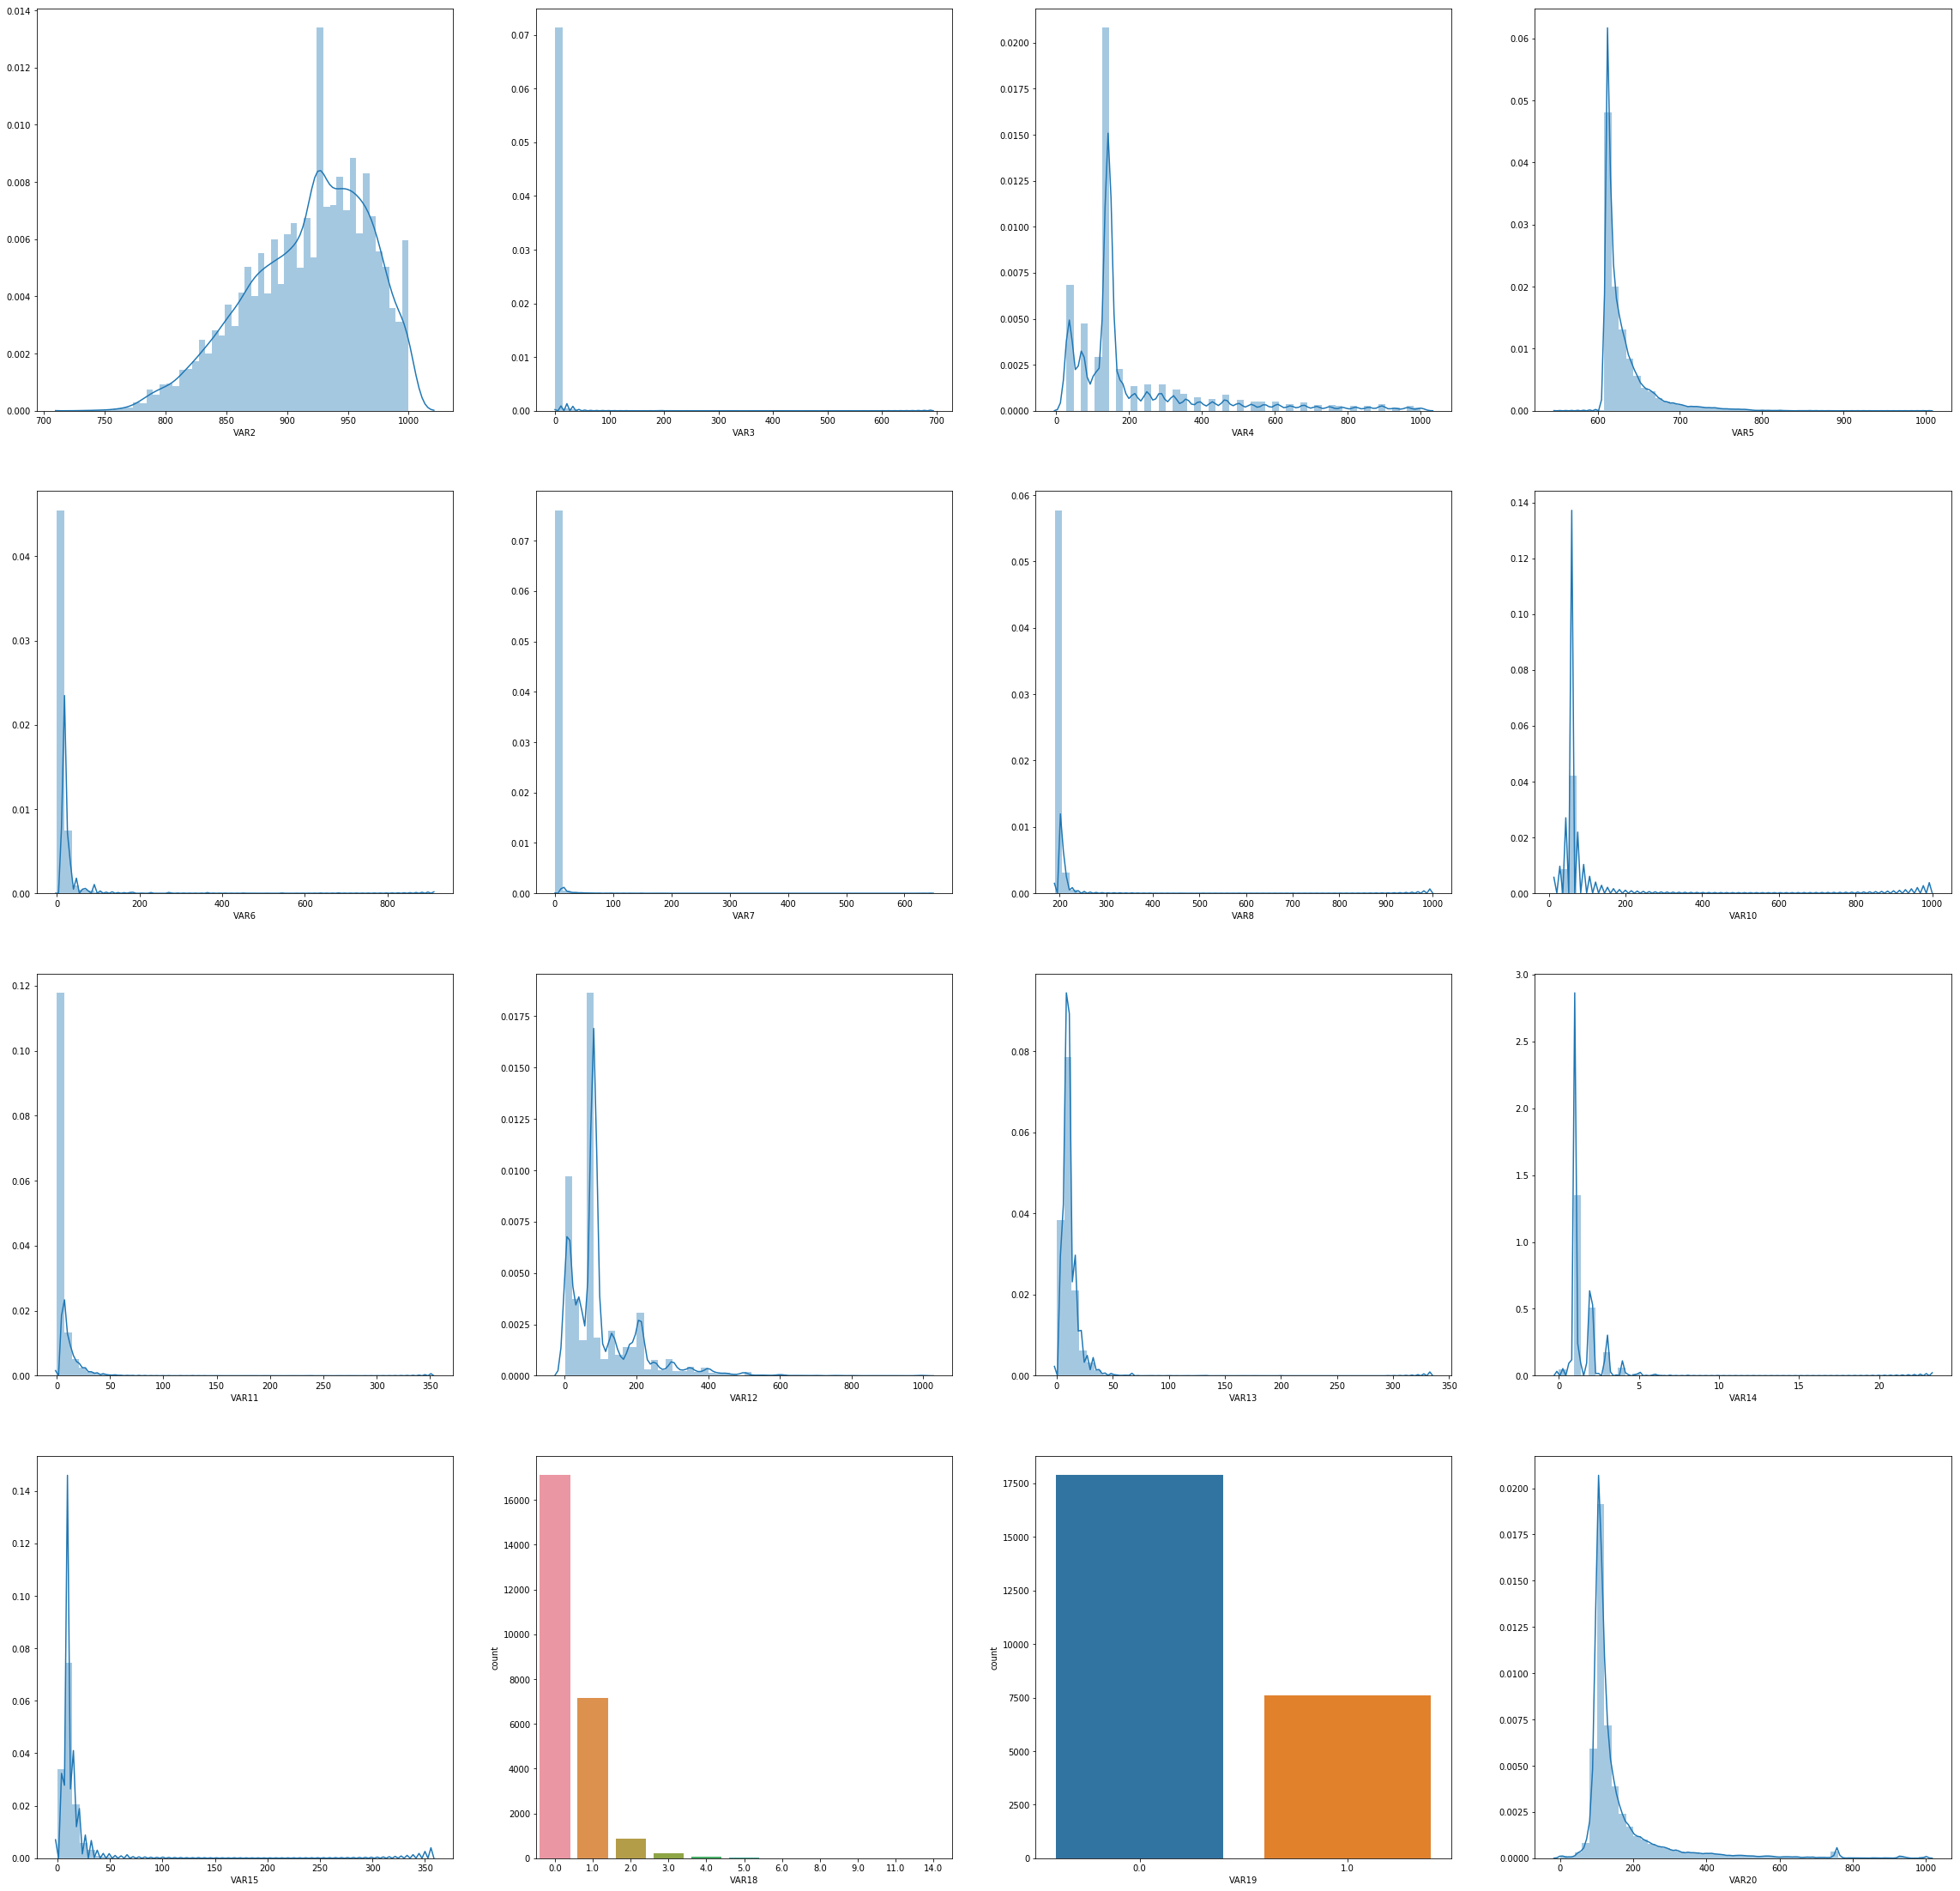

In [36]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(X_train_new.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_new[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_new[col].dropna(), ax=ax, label=col)

# Generating New Features

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree=3, interaction_only=True)

In [39]:
def create_interaction(poly, X):
    temp_X = X.drop('VAR19', axis=1)
    
    poly.fit(temp_X)
    new_X = pd.DataFrame(poly.transform(temp_X), index = temp_X.index, columns=poly.get_feature_names(temp_X.columns))
    new_X['VAR19'] = X['VAR19']
    
    return new_X

In [40]:
X_train_trans = create_interaction(poly, X_train_new)

In [41]:
X_train_trans.head()

1        VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                            
6730   1.0  982.352941  1.000000   71.428571  611.574748  10.000000  0.870128   
12884  1.0  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  1.0  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  1.0  931.764706  2.405556  142.857143  636.772180  10.909091  1.741903   
24498  1.0  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11  ...  VAR13 VAR14 VAR18  \
VAR1                                     ...                      
6730   197.682893  47.899686   3.580655  ...                0.0   
12884  200.014723  58.632548   2.105289  ...                0.0   
12749  197.449262  48.141176  11.596416  ...                0.0   
27420  199.668570  58.632548   2.105289  ...               30.0   
24498  196.962029  58.632548   2.133702  ...                0.0   

       VAR13 VAR14 VAR20  VAR13 VAR15 VAR18  VAR13 VAR15 VAR20  \
VAR1                                                             
6730         5669.810672                0.0       56698.106720   
12884        2437.762478                0.0       12188.812390   
12749        2332.676993                0.0       14384.841453   
27420       22698.795180              100.0       75662.650600   
24498         954.631096                0.0        8273.469496   

       VAR13 VAR18 VAR20  VAR14 VAR15 VAR18  VAR14 VAR15 VAR20  \
VAR1                                                             
6730             0.00000                0.0        5669.810672   
12884            0.00000                0.0        2437.762478   
12749            0.00000                0.0        2332.676993   
27420         7566.26506               30.0       22698.795180   
24498            0.00000                0.0         954.631096   

       VAR14 VAR18 VAR20  VAR15 VAR18 VAR20  VAR19  
VAR1                                                
6730            0.000000            0.00000    1.0  
12884           0.000000            0.00000    0.0  
12749           0.000000            0.00000    1.0  
27420        2269.879518         7566.26506    0.0  
24498           0.000000            0.00000    0.0  

[5 rows x 577 columns]

## Visualizing Feataures

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


ValueError: num must be 1 <= num <= 128, not 129

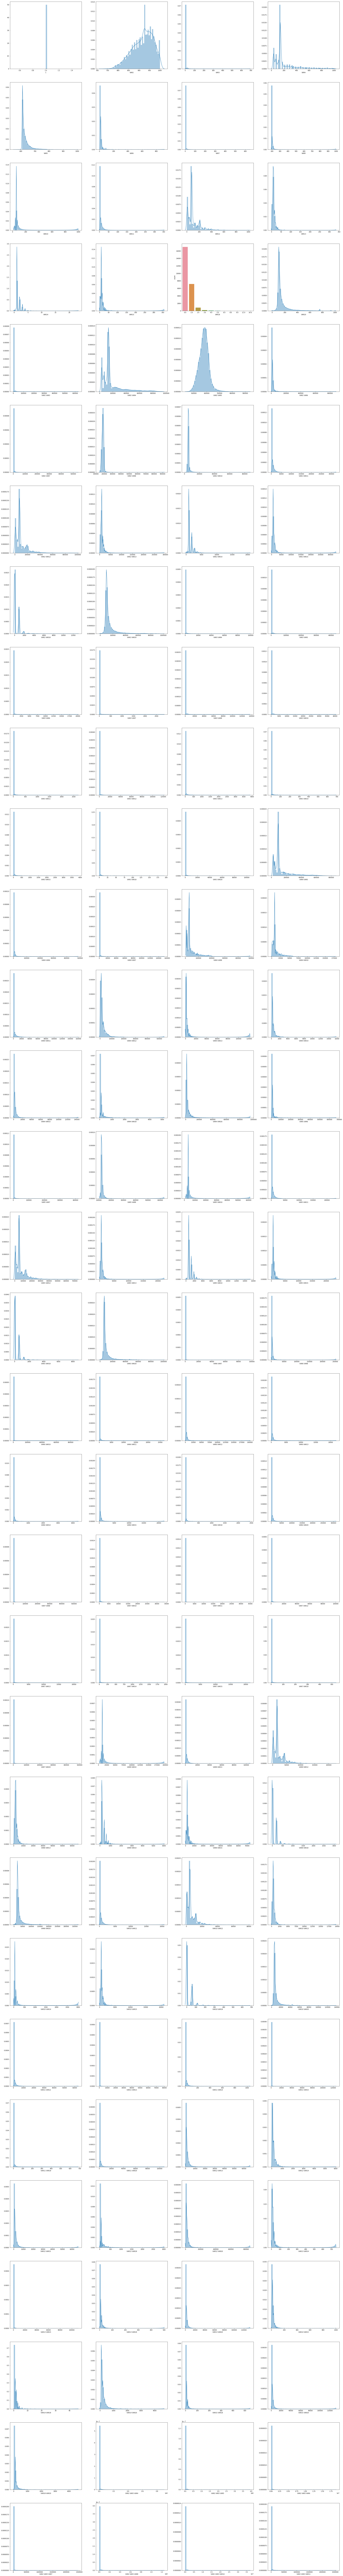

In [42]:
fig = plt.figure(figsize=(40,320))
for i, col in enumerate(X_train_trans.columns):
    ax = fig.add_subplot(32, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_trans[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_trans[col].dropna(), ax=ax, label=col)

In [43]:
X_train_trans.head()

1        VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                            
6730   1.0  982.352941  1.000000   71.428571  611.574748  10.000000  0.870128   
12884  1.0  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  1.0  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  1.0  931.764706  2.405556  142.857143  636.772180  10.909091  1.741903   
24498  1.0  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11  ...  VAR13 VAR14 VAR18  \
VAR1                                     ...                      
6730   197.682893  47.899686   3.580655  ...                0.0   
12884  200.014723  58.632548   2.105289  ...                0.0   
12749  197.449262  48.141176  11.596416  ...                0.0   
27420  199.668570  58.632548   2.105289  ...               30.0   
24498  196.962029  58.632548   2.133702  ...                0.0   

       VAR13 VAR14 VAR20  VAR13 VAR15 VAR18  VAR13 VAR15 VAR20  \
VAR1                                                             
6730         5669.810672                0.0       56698.106720   
12884        2437.762478                0.0       12188.812390   
12749        2332.676993                0.0       14384.841453   
27420       22698.795180              100.0       75662.650600   
24498         954.631096                0.0        8273.469496   

       VAR13 VAR18 VAR20  VAR14 VAR15 VAR18  VAR14 VAR15 VAR20  \
VAR1                                                             
6730             0.00000                0.0        5669.810672   
12884            0.00000                0.0        2437.762478   
12749            0.00000                0.0        2332.676993   
27420         7566.26506               30.0       22698.795180   
24498            0.00000                0.0         954.631096   

       VAR14 VAR18 VAR20  VAR15 VAR18 VAR20  VAR19  
VAR1                                                
6730            0.000000            0.00000    1.0  
12884           0.000000            0.00000    0.0  
12749           0.000000            0.00000    1.0  
27420        2269.879518         7566.26506    0.0  
24498           0.000000            0.00000    0.0  

[5 rows x 577 columns]

# Feature Transformation/Scaling

In [44]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [45]:
pt = PowerTransformer(method='box-cox')
minmax = MinMaxScaler()

In [46]:
pt.fit(1+X_train_trans)

E:\AnacondaInstaller\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))


PowerTransformer(copy=True, method='box-cox', standardize=True)

In [49]:
X_train_fin = pd.DataFrame(pt.transform(1+X_train_trans), index = X_train_trans.index, columns = X_train_trans.columns)

In [50]:
X_train_fin.head()

1      VAR2      VAR3      VAR4  VAR5      VAR6      VAR7  VAR8  \
VAR1                                                                       
6730   0.0  1.450749  1.411136 -0.887684   0.0 -0.019547 -0.418098   0.0   
12884  0.0 -0.256453 -0.817326  2.105020   0.0 -0.307928  1.424171   0.0   
12749  0.0 -0.934800 -0.487874  0.246387   0.0  0.413519  0.517573   0.0   
27420  0.0  0.192576  1.880754 -0.024872   0.0  0.103607  0.813640   0.0   
24498  0.0  0.325036  1.258625  0.246387   0.0 -0.479656 -1.258175   0.0   

          VAR10     VAR11  ...  VAR13 VAR14 VAR18  VAR13 VAR14 VAR20  \
VAR1                       ...                                         
6730  -2.237423  0.476130  ...          -0.684517           1.118569   
12884  0.471647 -0.001628  ...          -0.684517           0.274757   
12749 -2.169643  1.423026  ...          -0.684517           0.234925   
27420  0.471647 -0.001628  ...           1.598193           2.901987   
24498  0.471647  0.010430  ...          -0.684517          -0.493547   

       VAR13 VAR15 VAR18  VAR13 VAR15 VAR20  VAR13 VAR18 VAR20  \
VAR1                                                             
6730           -0.692498           1.109506          -0.699770   
12884          -0.692498          -0.055609          -0.699770   
12749          -0.692498           0.061885          -0.699770   
27420           1.454855           1.347913           1.534912   
24498          -0.692498          -0.323270          -0.699770   

       VAR14 VAR15 VAR18  VAR14 VAR15 VAR20  VAR14 VAR18 VAR20  \
VAR1                                                             
6730           -0.685293           1.059513          -0.689688   
12884          -0.685293           0.225134          -0.689688   
12749          -0.685293           0.185686          -0.689688   
27420           1.586994           2.816163           1.609898   
24498          -0.685293          -0.536884          -0.689688   

       VAR15 VAR18 VAR20     VAR19  
VAR1                                
6730            -0.69985  1.531601  
12884           -0.69985 -0.652912  
12749           -0.69985  1.531601  
27420            1.53053 -0.652912  
24498           -0.69985 -0.652912  

[5 rows x 577 columns]

# Visualizing Final Features

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


ValueError: num must be 1 <= num <= 128, not 129

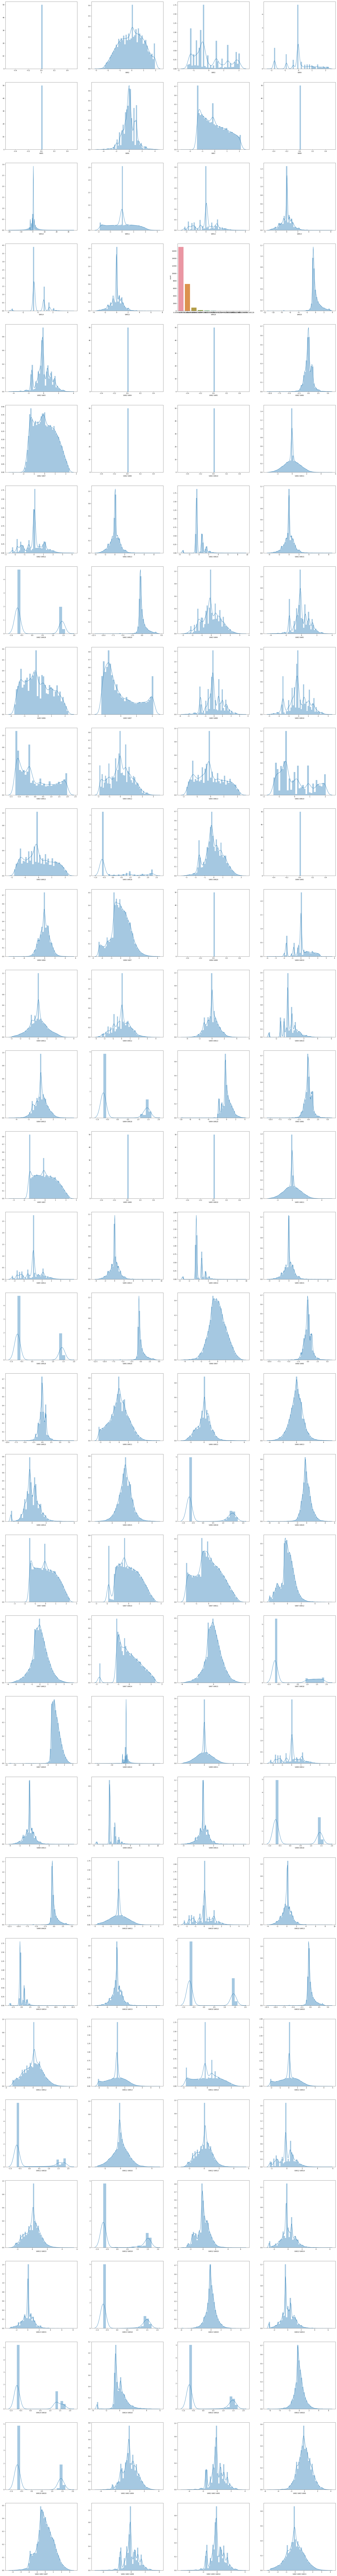

In [51]:
fig = plt.figure(figsize=(40,320))
for i, col in enumerate(X_train_fin.columns):
    ax = fig.add_subplot(32, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_fin[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_fin[col].dropna(), ax=ax, label=col)

---------------------------------
# Creating Pipeline

In [52]:
def transform(X, imp_freq, imp_med, poly, pt):
    
    ## Changes in VAR14
    X['VAR14'].replace('.', np.nan, inplace = True)
    X['VAR14'] = pd.to_numeric(train['VAR14'])
    
    ## Dropping VAR9 and VAR17 due to high missing values
    X.drop(['VAR9','VAR17'], axis = 1, inplace=True)

    ## Setting VAR1 as index
    X.set_index('VAR1', inplace=True)
    
    ## Dropping VAR16 on account of redudancy
    X.drop(['VAR16'], axis = 1, inplace=True)
    
    ## Mising Value Imputation
    X[['VAR14', 'VAR18', 'VAR19']] = imp_freq.transform(X[['VAR14', 'VAR18', 'VAR19']])
    X_new_arr = imp_med.transform(X)
    X = pd.DataFrame(X_new_arr, index=X.index, columns = X.columns)
    
    ## Feature generation
    X = create_interaction(poly, X)
    
    ## Feature Scaling
    X = pd.DataFrame(pt.transform(1+X), index = X.index, columns = X.columns)
    
    return X

In [53]:
val.head()

VAR1        VAR2      VAR3        VAR4        VAR5       VAR6  \
31267  31268  880.000000  0.383044  142.857143  619.995483   8.181818   
14378  14379  942.352941  0.055556   35.714286  632.407753   9.090909   
4114    4115  930.588235  0.388889  178.571429  642.857518  22.727364   
2758    2759  961.176471  0.027778         NaN  622.248599   6.363636   
18077  18078  954.117647  0.388889   35.714286  619.867684   4.545455   

           VAR7        VAR8  VAR9      VAR10  ...       VAR12      VAR13  \
31267  0.742883  197.211381   NaN  58.632548  ...  130.108424  13.066667   
14378  0.994108  197.784742   NaN  58.632548  ...  400.333611   6.666667   
4114   1.870301  204.409101   NaN  58.632548  ...         NaN        NaN   
2758   0.893318  197.470724   NaN  58.632548  ...    5.004170  13.333333   
18077  0.771246  197.759720   NaN  58.632548  ...         NaN  10.000000   

       VAR14      VAR15     VAR16  VAR17  VAR18  VAR19       VAR20   VAR21  
31267      1  13.066667  1.057403    NaN      0      0  109.803787     Low  
14378      1   6.666667  1.265733    NaN      0      0   98.969019  Medium  
4114       2        NaN  1.851504    NaN      0      0   48.709122    High  
2758       1  13.333333  1.134215    NaN      1      0  113.697074     Low  
18077      1  14.666667  1.078627  973.4      0      0  146.130809     Low  

[5 rows x 21 columns]

In [54]:
val.shape

(8500, 21)

In [55]:
leaderboard = pd.read_csv('leaderboard_dataset.csv')

In [56]:
evaluation = pd.read_csv('Evaluation_dataset.csv')

In [57]:
y_val = val['VAR21'].map({'Low':-1, 'Medium':0, 'High':1})
X_val = val.drop('VAR21', axis =1)

In [58]:
X_val.shape

(8500, 20)

In [60]:
X_val = transform(X_val, imp_freq, imp_med, poly, pt)

In [61]:
X_val.head()

1      VAR2      VAR3      VAR4  VAR5      VAR6      VAR7  VAR8  \
VAR1                                                                       
31268  0.0 -0.833039  0.470996 -0.024872   0.0 -0.307928 -0.747538   0.0   
14379  0.0  0.433511 -1.004934 -1.777932   0.0 -0.155800 -0.150923   0.0   
4115   0.0  0.166497  0.487196  0.246387   0.0  1.086682  0.913666   0.0   
2759   0.0  0.890439 -1.210289 -0.024872   0.0 -0.676123 -0.364484   0.0   
18078  0.0  0.714694  0.487196 -1.777932   0.0 -1.176382 -0.668495   0.0   

          VAR10     VAR11  ...  VAR13 VAR14 VAR18  VAR13 VAR14 VAR20  \
VAR1                       ...                                         
31268  0.471647 -0.433493  ...          -0.684517          -0.179334   
14379  0.471647 -1.631556  ...          -0.684517          -0.754677   
4115   0.471647 -0.001628  ...          -0.684517          -0.953595   
2759   0.471647 -0.873262  ...           1.475511          -0.134644   
18078  0.471647  0.939673  ...          -0.684517          -0.164515   

       VAR13 VAR15 VAR18  VAR13 VAR15 VAR20  VAR13 VAR18 VAR20  \
VAR1                                                             
31268          -0.692498           0.253670          -0.699770   
14379          -0.692498          -0.738985          -0.699770   
4115           -0.692498          -0.673562          -0.699770   
2759            1.518200           0.309040           1.433206   
18078          -0.692498           0.352432          -0.699770   

       VAR14 VAR15 VAR18  VAR14 VAR15 VAR20  VAR14 VAR18 VAR20  \
VAR1                                                             
31268          -0.685293          -0.224946          -0.689688   
14379          -0.685293          -0.796468          -0.689688   
4115           -0.685293          -0.994434          -0.689688   
2759            1.460119          -0.180614           1.381998   
18078          -0.685293           0.110933          -0.689688   

       VAR15 VAR18 VAR20     VAR19  
VAR1                                
31268          -0.699850 -0.652912  
14379          -0.699850 -0.652912  
4115           -0.699850 -0.652912  
2759            1.427545 -0.652912  
18078          -0.699850 -0.652912  

[5 rows x 577 columns]

In [62]:
X_leader = transform(leaderboard, imp_freq, imp_med, poly, pt)

In [63]:
X_evaluation = transform(evaluation, imp_freq, imp_med, poly, pt)

-----------------------------------------
# Modelling

## Creating Helpful Functions

In [64]:
# Scorer Function
def my_scorer(y, y_pred):
    
    score = 1000*(y_pred==y).sum() - 50*((y_pred==0) & (y==1)).sum() - 50*((y_pred==1) & (y==2)).sum() - 100*((y_pred==1) & (y==0)).sum() - 100*((y_pred==0) & (y==2)).sum() - 200*((y_pred==2) & (y==0)).sum()
    
    return score

In [65]:
from sklearn.metrics import make_scorer
my_score = make_scorer(my_scorer, greater_is_better=True)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [67]:
def print_results(clf, X_train, y_train, X_val, y_val):
    print('Training acc: ', clf.score(X_train.values, y_train.values))
    print('Validation acc: ', clf.score(X_val.values, y_val.values))
    print('Training score: ', my_score(clf, X_train.values, y_train.values))
    print('Validation score: ', my_score(clf, X_val.values, y_val.values))
    print('Confusion Matrix for Training:')
    print(confusion_matrix(y_train.values, clf.predict(X_train.values)))
    print('Confusion Matrix for Validation:')
    print(confusion_matrix(y_val.values, clf.predict(X_val.values)))

## LogisticRegression

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train_fin, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaInstaller\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
print_results(lr, X_train_fin, y_train, X_val, y_val)

Training acc:  0.5701510100019612
Validation acc:  0.5574117647058824
Training score:  14414100
Validation score:  4697650
Confusion Matrix for Training:
[[ 2705  6290    25]
 [ 1843 11757    42]
 [  405  2354    74]]
Confusion Matrix for Validation:
[[ 857 2195    8]
 [ 635 3862   29]
 [ 146  749   19]]


In [71]:
rf = RandomForestClassifier()

In [72]:
rf.fit(X_train_fin, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
print_results(rf, X_train_fin, y_train, X_val, y_val)

Training acc:  0.9835654049813689
Validation acc:  0.5155294117647059
Training score:  25069050
Validation score:  4340850
Confusion Matrix for Training:
[[ 8921    97     2]
 [  142 13499     1]
 [   40   137  2656]]
Confusion Matrix for Validation:
[[1307 1691   62]
 [1410 3006  110]
 [ 242  603   69]]


In [74]:
ada = AdaBoostClassifier()

In [75]:
ada.fit(X_train_fin, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [76]:
print_results(ada, X_train_fin, y_train, X_val, y_val)

Training acc:  0.5726220827613258
Validation acc:  0.562
Training score:  14471800
Validation score:  4736300
Confusion Matrix for Training:
[[ 3025  5970    25]
 [ 2106 11441    95]
 [  346  2354   133]]
Confusion Matrix for Validation:
[[ 983 2061   16]
 [ 739 3752   35]
 [ 128  744   42]]


In [77]:
svc = SVC()

In [78]:
svc.fit(X_train_fin, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
print_results(svc, X_train_fin, y_train, X_val, y_val)

Training acc:  0.5778387919199843
Validation acc:  0.562235294117647
Training score:  14603100
Validation score:  4737050
Confusion Matrix for Training:
[[ 1994  7025     1]
 [  937 12704     1]
 [  223  2576    34]]
Confusion Matrix for Validation:
[[ 585 2475    0]
 [ 335 4187    4]
 [  76  831    7]]


In [81]:
# Hyperparameter tuning on RandomForest
param_grid = {'bootstrap': [True, False],
 'max_depth': [2,5,7,10,15,20,30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train_fin, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 82.0min


In [ ]:
print_results(rf_random, X_train_fin, y_train, X_val, y_val)